In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('dataset.csv')

In [107]:
df

,Unnamed: 0,Preço,Marca,Modelo,GPU,Unidades de Processamento,Tamanho da Memória (GB),Velocidade da Memória (Gbps),Tipo da Memória,Interface da Memória (Bits),Fonte Recomendada (W),Garantia (Meses),Peso
0,0,2699.99,MSI,Radeon RX 6750 XT MECH 2X 12G OC,AMD,2560.0,12.0,18.0,GDDR6,192.0,650.0,36.0,1474.0
1,1,2299.99,ASUS,Dual RTX 3060 O12G V2,NVIDIA,3584.0,12.0,15.0,GDDR6,192.0,650.0,12.0,880.0
2,2,1559.99,ASRock,AMD Radeon RX 6600 CLD 8G,AMD,1792.0,8.0,14.0,GDDR6,128.0,500.0,12.0,627.0
3,3,1739.99,PNY,VCG30508DFMPB,NVIDIA,2560.0,8.0,NaN,GDDR6,128.0,NaN,36.0,1052.0
4,4,2499.99,PNY,VCG306012DFBPB1,NVIDIA,3584.0,12.0,15.0,GDDR6,192.0,NaN,36.0,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,NaN,Pny,NVIDIA QUADRO T600,NVIDIA,640.0,4.0,NaN,GDDR6,128.0,NaN,12.0,450.0
1246,1246,NaN,MSI Modelo: 912-V389-205 Motor gráfico: NVIDIA...,912-V389-205 Motor gráfico: NVIDIA® GeForce RT...,NVIDIA,NaN,10.0,19.0,GDDR6X,NaN,912.0,12.0,3000.0
1247,1247,NaN,Galax,Geforce GTX 1660 Super 6GB,NVIDIA,1408.0,6.0,14.0,GDDR6,192.0,125.0,3.0,1070.0
1248,1248,NaN,Pcwinmax,Geforce Gt 740,NVIDIA,192.0,4.0,NaN,NaN,128.0,NaN,6.0,4000.0


## Medidas de Tendência Central

### Média

#### Média de Preço

In [87]:
df['Preço'].mean()

3834.822132352941

#### Média de Peso

In [88]:
df['Peso'].mean()

1430.2224080267558

#### Média de Unidades de Processamento

In [150]:
df_cores = df

In [138]:
df_cores['Unidades de Processamento'] = pd.to_numeric(df_cores['Unidades de Processamento'], errors='coerce')

In [139]:
df_cores['Unidades de Processamento']

0       2560.0
1       3584.0
2       1792.0
3       2560.0
4       3584.0
         ...  
1245     640.0
1246       NaN
1247    1408.0
1248     192.0
1249       NaN
Name: Unidades de Processamento, Length: 1250, dtype: float64

In [140]:
# Removendo valores errados
count = 0
indices = []
for linha in range(len(df_cores)):
    if df_cores['Unidades de Processamento'].iloc[linha] > 20000:
        count += 1
        indices.append(linha)
print(count)

63


In [144]:
df_cores = df_cores.drop(indices)

In [145]:
df_cores

,Unnamed: 0,Preço,Marca,Modelo,GPU,Unidades de Processamento,Tamanho da Memória (GB),Velocidade da Memória (Gbps),Tipo da Memória,Interface da Memória (Bits),Fonte Recomendada (W),Garantia (Meses),Peso
0,0,2699.99,MSI,Radeon RX 6750 XT MECH 2X 12G OC,AMD,2560.0,12.0,18.0,GDDR6,192.0,650.0,36.0,1474.0
1,1,2299.99,ASUS,Dual RTX 3060 O12G V2,NVIDIA,3584.0,12.0,15.0,GDDR6,192.0,650.0,12.0,880.0
2,2,1559.99,ASRock,AMD Radeon RX 6600 CLD 8G,AMD,1792.0,8.0,14.0,GDDR6,128.0,500.0,12.0,627.0
3,3,1739.99,PNY,VCG30508DFMPB,NVIDIA,2560.0,8.0,NaN,GDDR6,128.0,NaN,36.0,1052.0
4,4,2499.99,PNY,VCG306012DFBPB1,NVIDIA,3584.0,12.0,15.0,GDDR6,192.0,NaN,36.0,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,NaN,Pny,NVIDIA QUADRO T600,NVIDIA,640.0,4.0,NaN,GDDR6,128.0,NaN,12.0,450.0
1246,1246,NaN,MSI Modelo: 912-V389-205 Motor gráfico: NVIDIA...,912-V389-205 Motor gráfico: NVIDIA® GeForce RT...,NVIDIA,NaN,10.0,19.0,GDDR6X,NaN,912.0,12.0,3000.0
1247,1247,NaN,Galax,Geforce GTX 1660 Super 6GB,NVIDIA,1408.0,6.0,14.0,GDDR6,192.0,125.0,3.0,1070.0
1248,1248,NaN,Pcwinmax,Geforce Gt 740,NVIDIA,192.0,4.0,NaN,NaN,128.0,NaN,6.0,4000.0


In [146]:
df_cores['Unidades de Processamento'].mean()

3877.1986206896554

### Mediana

#### Preço

In [147]:
df['Preço'].median()

2199.995

#### Peso

In [148]:
df['Peso'].median()

1063.0

#### Unidades de Processamento

In [149]:
df_cores['Unidades de Processamento'].median()

2560.0

### Moda

#### Garantia

In [158]:
df['Garantia (Meses)'].value_counts()

Garantia (Meses)
12.0    673
3.0     392
36.0     94
24.0     38
6.0      15
0.0       7
48.0      3
90.0      2
9.0       1
Name: count, dtype: int64


In [164]:
print("Moda Garantia:")
df['Garantia (Meses)'].mode()

Moda Garantia:


0    12.0
Name: Garantia (Meses), dtype: float64

#### GPU

In [165]:
df['GPU'].value_counts()

GPU
NVIDIA    880
AMD       225
Intel       4
Name: count, dtype: int64

In [167]:
print("Moda GPU: ")
df['GPU'].mode()

Moda GPU: 


0    NVIDIA
Name: GPU, dtype: object

#### Tipo de Memória - Corrigir Depois

In [ ]:
df['Tipo da Memória'].value_counts()

## Medidas de Variabilidade

### Desvio

In [169]:
media_precos = df['Preço'].mean()
media_precos

3834.822132352941

In [171]:
d = df['Preço'].apply(lambda x: x - media_precos)
d

0      -1134.832132
1      -1534.832132
2      -2274.832132
3      -2094.832132
4      -1334.832132
           ...     
1245            NaN
1246            NaN
1247            NaN
1248            NaN
1249            NaN
Name: Preço, Length: 1250, dtype: float64

### Variância

In [172]:
df['Preço'].var()

18663135.85231294

### Desvio Padrão

In [173]:
df['Preço'].std()

4320.085167252255

## Boxplot

<Axes: >

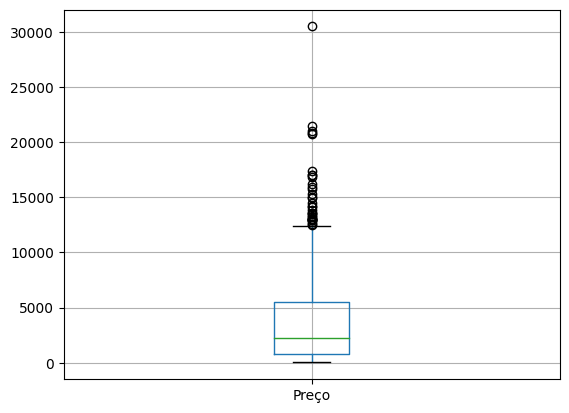

In [174]:
df.boxplot(column=['Preço'])

<Axes: title={'center': 'Preço'}, xlabel='GPU'>

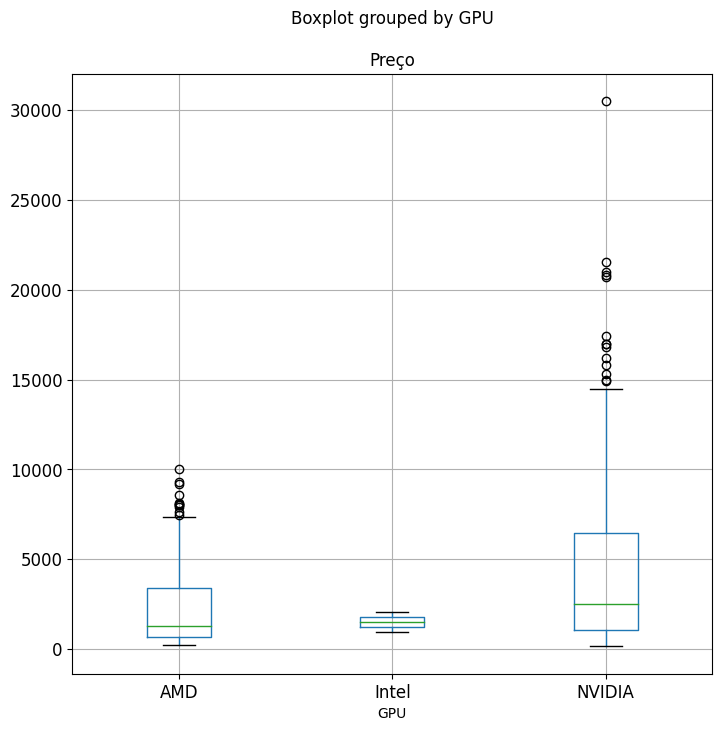

In [4]:
df.boxplot(by='GPU', column=['Preço'], fontsize='large', figsize=(8,8))